In [23]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


path = "dataset/Housing Prices/train.csv"
home_data = pd.read_csv(path)

In [24]:
y = home_data.SalePrice
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

In [25]:
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [26]:
len(train_X), len(val_X), len(train_y), len(val_y)

(1095, 365, 1095, 365)

In [27]:
model = RandomForestRegressor(random_state=1)
model.fit(train_X, train_y)

RandomForestRegressor(random_state=1)

In [30]:
validation_prediction = model.predict(val_X)
val_mse = mean_absolute_error(validation_prediction, val_y)
print("Validation MSE (no leafs specified in model): {:,.0f}".format(val_mse))

Validation MSE (no leafs specified in model): 21,857


In [32]:
# now with leafs specified
model1 = RandomForestRegressor(max_leaf_nodes=100, random_state=1)
model1.fit(train_X, train_y)
validation_prediction1 = model1.predict(val_X)
val_mse1 = mean_absolute_error(validation_prediction1, val_y)
print("Validation MSE (with leafs specified in model): {:,.0f}".format(val_mse1))

Validation MSE (with leafs specified in model): 22,041


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


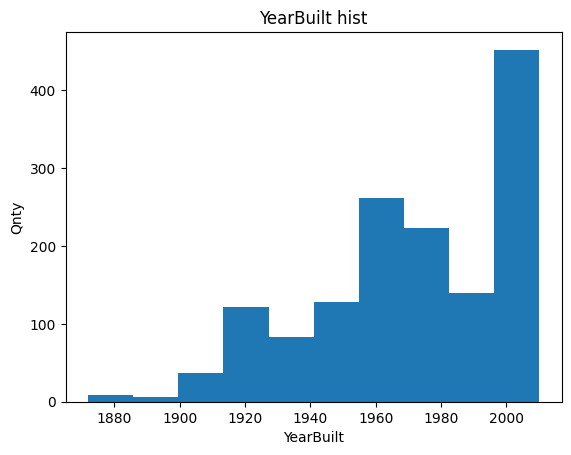

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)

ax.set_title("YearBuilt hist")
ax.hist(X.YearBuilt)
ax.set_xlabel("YearBuilt")
ax.set_ylabel("Qnty")

home_data